<a href="https://colab.research.google.com/github/Asma-Draouil/Feature_Asma/blob/main/Vectorisation_licence_spacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk


In [2]:
url="https://raw.githubusercontent.com/Asma-Draouil/Feature_Asma/refs/heads/main/Nouveau%20dossier/licence.csv"
df = pd.read_csv(url)


In [3]:
data_cleaned = df.copy()

In [4]:
parcours = [
    "Comptabilité",
    "Management",
    "Mathématiques Appliquées à l’Analyse des Données et à l’Aide à la Décision",
    "Business Intelligence",
    "Business Information Systems"
]
data_cleaned.insert(0, "Parcours", parcours[:len(data_cleaned)])


In [5]:
# Télécharger les ressources nécessaires pour NLTK
nltk.download('stopwords')


# Charger les stopwords en français
stop_words = set(stopwords.words('french'))

def nettoyer_colonne_avance(texte):
    if not isinstance(texte, str):  # Vérifie que la valeur est une chaîne
        return ''
    # Convertir en minuscules
    texte = texte.lower()
    # Remplacer les caractères spéciaux et ponctuations par des espaces
    texte = re.sub(r'[^\w\s]', ' ', texte)
    # Supprimer les espaces multiples
    texte = re.sub(r'\s+', ' ', texte).strip()
    # Supprimer les mots inutiles
    mots = texte.split()  # Divise le texte en mots avec split (pas de tokenisation)
    mots = [mot for mot in mots if mot not in stop_words]
    return ' '.join(mots)  # Recombine les mots filtrés


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Liste des colonnes textuelles
colonnes_textuelles = [
    "Objectifs", "Contenu", "Compétences", "Métiers",
    "Secteurs d’activité", "Partenariats professionnels",
    "Semestre 1", "Semestre 2", "Semestre 3", "Semestre 4", "Semestre 5", "Semestre 6"
]

# Vérifiez quelles colonnes existent dans le DataFrame
colonnes_existe = [col for col in colonnes_textuelles if col in data_cleaned.columns]


for col in colonnes_existe:
    data_cleaned[col] = data_cleaned[col].fillna('').apply(nettoyer_colonne_avance)



In [7]:
data_cleaned = data_cleaned.fillna('')

In [12]:
data_cleaned.head()

,Parcours,Objectifs,Contenu,Compétences,Métiers,Secteurs d’activité,Partenariats professionnels,Semestre 1,Semestre 2,Semestre 3,Semestre 4,Semestre 5,Semestre 6
0,Comptabilité,licence science gestion parcours managementvis...,comptabilite fiscalite finance comptabilité fi...,maîtriser techniques élaboration supports comm...,comptable contrôleur gestion trésorier financi...,cabinets expertise comptable départements comp...,entreprise services numériques sociétés consei...,principes gestion 1 comptabilité financière 1 ...,principes gestion 2 comptabilité financière 2 ...,comptabilité intermédiaire i comptabilité gest...,comptabilité intermédiaire ii contrôle interne...,comptabilité avancée cadre conceptuel présenta...,comptabilité internationale ifrs audit décisio...
1,Management,licence science gestion parcours managementvis...,sciences gestion gestion economie comptabilité...,analyser évolutions environnement affaires ana...,chargé clientèle chef projet chef produit mana...,entreprises services numériques entreprises in...,agence communication sociétés conseil entrepri...,principes gestion 1 comptabilité financière 1 ...,principes gestion 2 comptabilité financière 2 ...,fondamentaux management comptabilité gestion f...,fondamentaux grh diagnostic financier gestion ...,théorie organisations analyses quantitatives q...,management innovation entrepreneuriat manageme...
2,Mathématiques Appliquées à l’Analyse des Donné...,monde devenu mathématique décision repose anal...,mathématiques statistiques analyse données opt...,aider organisations créer valeur innover leurs...,analyste données chargé études actuarielles as...,sociétés services informatique éditeurs logici...,entreprises services numériques banques assura...,algèbre 1 analyse 1 base données programmation...,algèbre 2 analyse 2 systèmes gestion bases don...,algèbre 3 analyse 3 intelligence artificielle ...,recherche opérationnelle analyse 4 introductio...,probabilités calcul différentiel mathématiques...,
3,Business Intelligence,licence business computing parcoursbusiness in...,informatique bi systèmes information développe...,maîtriser utilisation outil informatique gesti...,développeur testeur concepteur architecte syst...,sociétés services informatique éditeurs logici...,entreprises services numériques banques assura...,algorithmique structures données 1 systèmes ex...,algorithmique structures données 2 fondements ...,programmation oo programmation web 1 conceptio...,gestion opérations logistique business process...,intégration si erp génie logiciel gestion proj...,
4,Business Information Systems,objectif former consultants dotés assise théor...,informatique bi systèmes information développe...,concevoir développer solution décisionnelle an...,consultant bi analyste consultant décisionnel ...,sociétés services informatique éditeurs logici...,entreprises services numériques banques assura...,algorithmique structures données 1 systèmes ex...,algorithmique structures données 2 fondements ...,programmation oo programmation web 1 conceptio...,gestion opérations logistique business process...,intégration si erp génie logiciel gestion proj...,


In [8]:
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

# Appliquer la tokenisation à chaque cellule de toutes les colonnes
data_cleaned = data_cleaned.apply(lambda col: col.apply(word_tokenize))

# Vérifier les résultats
#print(data_cleaned.head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [9]:
from nltk.stem.snowball import FrenchStemmer

# Initialiser le stemmer pour le français
stemmer = FrenchStemmer()

# Exemple d'application du stemming sur des données tokenisées
data_cleaned = data_cleaned.applymap(
    lambda x: [stemmer.stem(word) for word in x] if isinstance(x, list) else x
)

# Vérifier les résultats
#

<ipython-input-9-1fdba3979c3e>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_cleaned = data_cleaned.applymap(


In [ ]:
#Vectorisation avec tf-idf
# Remplacer les valeurs manquantes par une chaîne vide et convertir toutes les colonnes en chaînes
data_cleaned = data_cleaned.fillna('').astype(str)

# Exclure la colonne 'Parcours'
colonnes_a_vectoriser = data_cleaned.drop(columns=['Parcours']).columns

# Vectorisation avec gestion des erreurs de type
vecteurs = {}
tfidf_vectorizer = TfidfVectorizer(max_features=500)

for col in colonnes_a_vectoriser:
    vecteurs[col] = tfidf_vectorizer.fit_transform(data_cleaned[col])

# Combiner les matrices TF-IDF
from scipy.sparse import hstack
vecteurs_combines = hstack(list(vecteurs.values()))
# Afficher la dimension de la matrice finale
print(f"Dimensions de la matrice combinée : {vecteurs_combines.shape}")



Dimensions de la matrice combinée : (5, 812)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


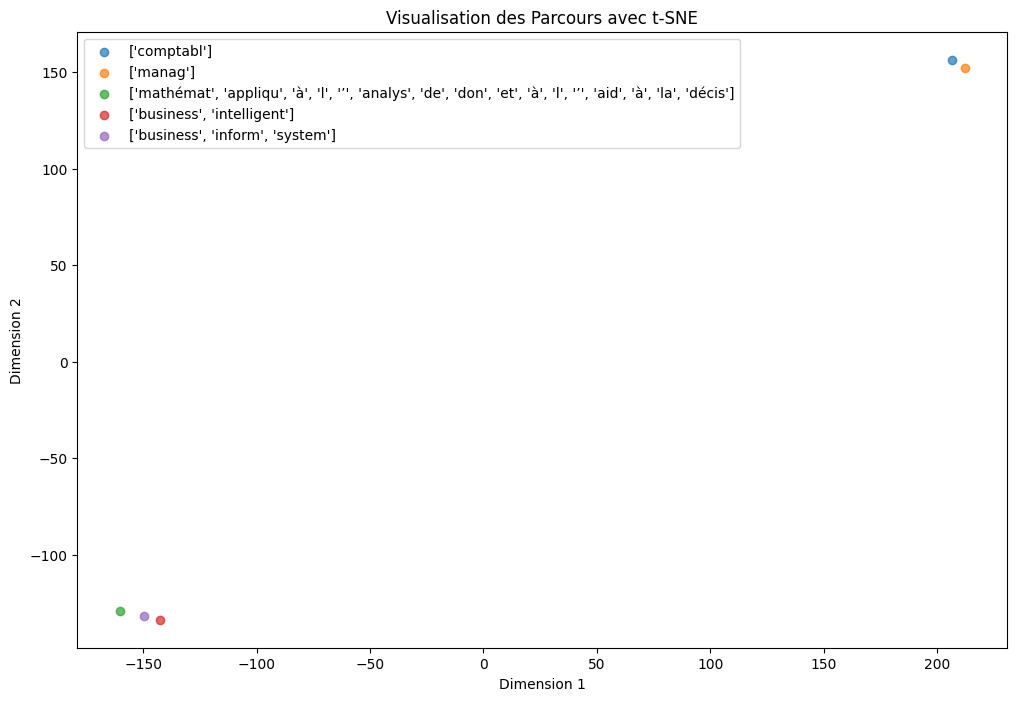

In [ ]:
# Visualisation avec t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=1, n_iter=1000)
data_tsne = tsne.fit_transform(vecteurs_combines.toarray())

# Créer un DataFrame pour visualisation
import matplotlib.pyplot as plt
df_tsne = pd.DataFrame(data_tsne, columns=['Dimension 1', 'Dimension 2'])
df_tsne['Parcours'] = data_cleaned['Parcours']

# Visualisation
plt.figure(figsize=(12, 8))
for parcours in df_tsne['Parcours'].unique():
    subset = df_tsne[df_tsne['Parcours'] == parcours]
    plt.scatter(subset['Dimension 1'], subset['Dimension 2'], label=parcours, alpha=0.7)

plt.title("Visualisation des Parcours avec t-SNE")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()


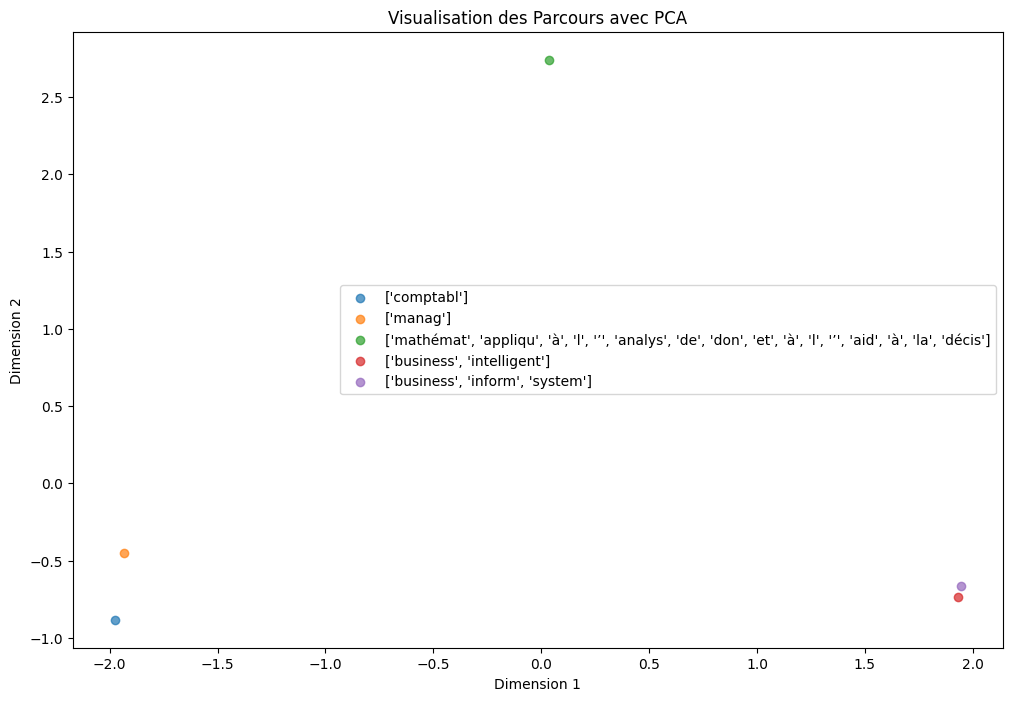

In [ ]:
# Visualisation avec PCA (Réduction dimensionnelle )
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
data_pca = pca.fit_transform(vecteurs_combines.toarray())

# Créer un DataFrame pour visualisation
df_pca = pd.DataFrame(data_pca, columns=['Dimension 1', 'Dimension 2'])
df_pca['Parcours'] = data_cleaned['Parcours']

# Visualisation
plt.figure(figsize=(12, 8))
for parcours in df_pca['Parcours'].unique():
    subset = df_pca[df_pca['Parcours'] == parcours]
    plt.scatter(subset['Dimension 1'], subset['Dimension 2'], label=parcours, alpha=0.7)

plt.title("Visualisation des Parcours avec PCA")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

In [11]:
#vector avec SPACY
# Installer spaCy
!pip install spacy

# Télécharger le modèle français
!python -m spacy download fr_core_news_md
import spacy
import numpy as np

# Charger le modèle spaCy pré-entraîné pour le français
nlp = spacy.load("fr_core_news_md")  # Modèle français

# Remplacer les valeurs manquantes par une chaîne vide et convertir toutes les colonnes en chaînes
data_cleaned = data_cleaned.fillna('').astype(str)

# Sélectionner toutes les colonnes à vectoriser
colonnes_a_vectoriser = data_cleaned.columns

# Fonction pour vectoriser un texte avec spaCy (en utilisant la moyenne des vecteurs de mots)
def vectorize_text_spacy(text, nlp, dimension=300):
    doc = nlp(text)  # Appliquer le modèle spaCy au texte
    # Moyenne des vecteurs de mots pour obtenir un seul vecteur
    vectors = [token.vector for token in doc if token.has_vector]  # Inclure uniquement les tokens qui ont un vecteur
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(dimension)  # Retourner un vecteur nul si aucun vecteur n'est trouvé

# Vectoriser chaque colonne et convertir en matrice 2D
vecteurs = {}
for col in colonnes_a_vectoriser:
    print(f"Vectorisation de la colonne : {col}")
    vecteurs[col] = np.array([vectorize_text_spacy(str(text), nlp) for text in data_cleaned[col]])

# Convertir chaque tableau 2D pour compatibilité avec hstack
matrices = [np.array(vecteurs[col]) for col in colonnes_a_vectoriser]

# Combiner les matrices horizontalement
vecteurs_combines_spacy = np.hstack(matrices)

# Afficher les dimensions de la matrice finale
print(f"Dimensions de la matrice combinée : {vecteurs_combines_spacy.shape}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 MB 17.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Vectorisation de la colonne : Parcours
Vectorisation de la colonne : Objectifs
Vectorisation de la colonne : Contenu
Vectorisation de la colonne : Compétences
Vectorisation de la colonne : Métiers
Vectorisation de la colonne : Secteurs d’activité
Vectorisation de la colonne : Partenariats professionnels
Vectorisation de la colonne : Semestre 1
Vectorisation de la colonne : Semestre 2
Vectorisation de la colonne : Semestre 3
Vectorisation de la colonne : Semestre 4
Vectorisation de la colonne : Semestre 5
Vectorisation de la colonne : Semestre 6
Dimensions de la matrice combin

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


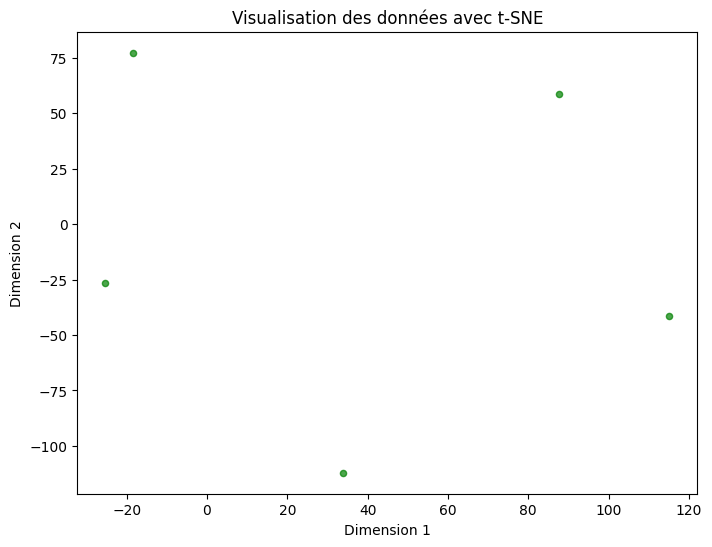

In [15]:
# Visualisation avec t-SNE
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Réduction de dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=4, n_iter=1000)
vecteurs_tsne = tsne.fit_transform(vecteurs_combines_spacy)

# Visualisation avec t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(vecteurs_tsne[:, 0], vecteurs_tsne[:, 1], alpha=0.7, s=20, c='green')
plt.title("Visualisation des données avec t-SNE")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


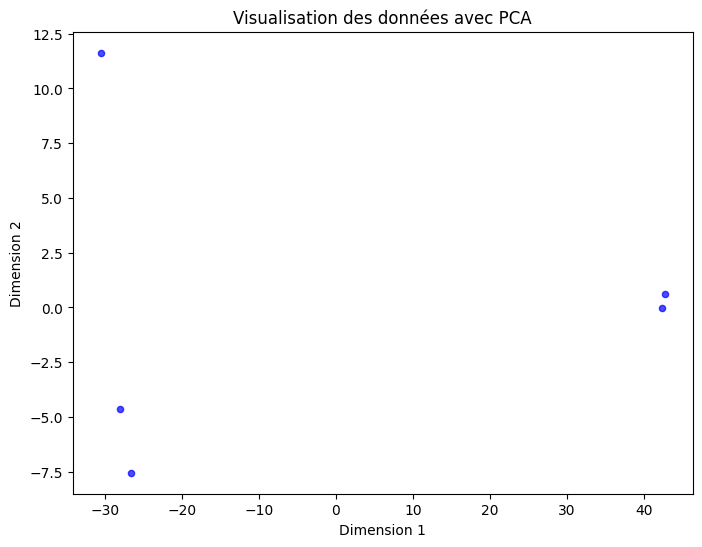

In [16]:
# Visualisation avec PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Réduction de dimensions avec PCA
pca = PCA(n_components=2)  # Réduire à 2 dimensions
vecteurs_pca = pca.fit_transform(vecteurs_combines_spacy)

# Visualisation avec PCA
plt.figure(figsize=(8, 6))
plt.scatter(vecteurs_pca[:, 0], vecteurs_pca[:, 1], alpha=0.7, s=20, c='blue')
plt.title("Visualisation des données avec PCA")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()